## PROJECT SALES DATA##

### Demonstrate###

* How to import Excel files into pandas.
* Filter, add new columns, and explore DataFrames.
* Apply common Excel operations such as pivot tables and VLOOKUP in Python.
* Present data as visualizations using matplotlib and seaborn.


### Questions I need to answer:###

1.  How did the company do in revenue over the years?
2.  How is revenue divided by channel type overall and over time?
3.  Who are the employees responsible for the most B2B sales overall and in 2013?

In [1]:
# I am importing the packages I will use.
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#Read the excel file which is saved in the same folder.
data=pd.ExcelFile('sales_data_dirty.xlsx')

In [6]:
#Display the sheet names I am dealing with.
print(data.sheet_names)

['sales', 'customers', 'dates', 'employees']


**VIEWING (PARSE) THE DATA IN EACH SHEET** 


In [7]:
# First I will view the sales data and only the first 5 rows
viewSales=data.parse('sales')
print(viewSales.shape)
print(viewSales.head(5))

(31465, 5)
   SalesOrderID    TotalDue  NumberofItems  OnlineOrderFlag  Status
0         43659  23153.2339             12                0       5
1         43660   1457.3288              2                0       5
2         43661  36865.8012             15                0       5
3         43662  32474.9324             22                0       5
4         43663    472.3108              1                0       5


In [9]:
# I will view the customer data again first 5 rows
viewCustomer=data.parse('customers')
print(viewCustomer.shape)
print(viewCustomer.head(5))

(31465, 6)
   SalesOrderID CustomerFirstName CustomerLastName EmployeeFirstName  \
0         43659               NaN              NaN              Tsvi   
1         43660               NaN              NaN              Tsvi   
2         43661               NaN              NaN              José   
3         43662               NaN              NaN              José   
4         43663               NaN              NaN             Linda   

  EmployeeLastName ChannelType  
0           Reiter         NaN  
1           Reiter         NaN  
2          Saraiva         NaN  
3          Saraiva         NaN  
4         Mitchell         NaN  


In [19]:
#View the dates data again first 5 rows.
viewDates=data.parse('dates')
print(viewDates.shape)
print(viewDates.head(5))

(31465, 3)
   SalesOrderID            OrderDate             ShipDate
0         43659  2011-05-31 00:00:00  2011-06-07 00:00:00
1         43660  2011-05-31 00:00:00  2011-06-07 00:00:00
2         43661  2011-05-31 00:00:00  2011-06-07 00:00:00
3         43662  2011-05-31 00:00:00  2011-06-07 00:00:00
4         43663  2011-05-31 00:00:00  2011-06-07 00:00:00


In [10]:
#View the employees data, first 5 rows.
viewEmployees=data.parse('employees')
print(viewEmployees.shape)
print(viewEmployees.head(5))

(17, 5)
  FirstName  LastName CountryCode      RegionName  CommissionPct
0       Amy   Alberts          GB  United Kingdom          0.000
1     David  Campbell          US       Northwest          0.012
2   Garrett    Vargas          CA          Canada          0.010
3       Jae       Pak          CA          Canada          0.020
4   Jillian    Carson          US       Southwest          0.015


## I need to understand the data in more detail##

**I will do this using the following methods.**

* .info() provides a bird's eye view of column data types and missing values
* .describe() returns a distribution of numeric columns in your DataFrame
* .unique() gives out the number of unique values in a column

In [11]:
# I will view the sales data in more detail using describe.
viewSales.describe()

SalesOrderID       TotalDue  NumberofItems  OnlineOrderFlag   Status
count  31465.000000   31465.000000   31465.000000     31465.000000  31465.0
mean   59391.000000    3915.995109       3.855617         0.879040      5.0
std     9083.307446   12515.462713       7.214877         0.326086      0.0
min    43659.000000       1.518300       1.000000         0.000000      5.0
25%    51525.000000      62.951900       1.000000         1.000000      5.0
50%    59391.000000     865.204000       2.000000         1.000000      5.0
75%    67257.000000    2615.490800       3.000000         1.000000      5.0
max    75123.000000  187487.825000      72.000000         1.000000      5.0

In [12]:
# I will view the sales info.
viewSales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31465 entries, 0 to 31464
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   SalesOrderID     31465 non-null  int64  
 1   TotalDue         31465 non-null  float64
 2   NumberofItems    31465 non-null  int64  
 3   OnlineOrderFlag  31465 non-null  int64  
 4   Status           31465 non-null  int64  
dtypes: float64(1), int64(4)
memory usage: 1.2 MB


In [17]:
#* I want to check if the status and online order flag column has no other unqiue values as seen 
print(viewSales['Status'].unique())

[5]


In [16]:
print(viewSales['OnlineOrderFlag'].unique())

[0 1]


* Looks like we have Order date and Ship date as object in pandas (strings)

In [20]:
viewDates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31465 entries, 0 to 31464
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   SalesOrderID  31465 non-null  int64 
 1   OrderDate     31465 non-null  object
 2   ShipDate      31465 non-null  object
dtypes: int64(1), object(2)
memory usage: 737.6+ KB


* Looks like we have missing values here

In [21]:
viewCustomer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31465 entries, 0 to 31464
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   SalesOrderID       31465 non-null  int64 
 1   CustomerFirstName  17463 non-null  object
 2   CustomerLastName   17463 non-null  object
 3   EmployeeFirstName  3806 non-null   object
 4   EmployeeLastName   3806 non-null   object
 5   ChannelType        17463 non-null  object
dtypes: int64(1), object(5)
memory usage: 1.4+ MB


* How many missing values in the customer sheet?
* False means no missing values in that column and True means missing values in that column

In [124]:
#I will ise isna to check.
viewCustomer.isna()

SalesOrderID  CustomerFirstName  CustomerLastName  EmployeeFirstName  \
0             False               True              True              False   
1             False               True              True              False   
2             False               True              True              False   
3             False               True              True              False   
4             False               True              True              False   
...             ...                ...               ...                ...   
31460         False              False             False               True   
31461         False              False             False               True   
31462         False              False             False               True   
31463         False              False             False               True   
31464         False              False             False               True   

       EmployeeLastName  ChannelType  
0                 False         True  
1                 False         True  
2                 False         True  
3                 False         True  
4                 False         True  
...                 ...          ...  
31460              True        False  
31461              True        False  
31462              True        False  
31463              True        False  
31464              True        False  

[31465 rows x 6 columns]

In [23]:
#I can use isna and sum together to find out exactly how many lines are missing in this data.
viewCustomer.isna().sum()

SalesOrderID             0
CustomerFirstName    14002
CustomerLastName     14002
EmployeeFirstName    27659
EmployeeLastName     27659
ChannelType          14002
dtype: int64

## Making the data ready##
* Lets drop the status column from the sales worksheet.
* Also lets change the OnlineOrderFlag to something more meaningful from 0 and 1.

In [24]:
#Redisplay viewSales to see what I am dealing with.
viewSales.describe()

SalesOrderID       TotalDue  NumberofItems  OnlineOrderFlag   Status
count  31465.000000   31465.000000   31465.000000     31465.000000  31465.0
mean   59391.000000    3915.995109       3.855617         0.879040      5.0
std     9083.307446   12515.462713       7.214877         0.326086      0.0
min    43659.000000       1.518300       1.000000         0.000000      5.0
25%    51525.000000      62.951900       1.000000         1.000000      5.0
50%    59391.000000     865.204000       2.000000         1.000000      5.0
75%    67257.000000    2615.490800       3.000000         1.000000      5.0
max    75123.000000  187487.825000      72.000000         1.000000      5.0

In [25]:
#Creating a new variable salesView because I am going to drop the Status and change the Online Order Flag. 
#I could have changed the data in viewSales but I want to leave a trail of my work above so I will create a new variable.

#axis = 1 because I am  droping a column and inplace is to make the change in your variable  view Sales.
#If I want to make the change in the existing df I can change inplace to 'True' and remove my new variable salesView.
salesView=viewSales.drop('Status', axis=1, inplace=False)

#Display the df again using describe. I  can see Status has been dropped with my new variable called salesView.
salesView.describe() 

SalesOrderID       TotalDue  NumberofItems  OnlineOrderFlag
count  31465.000000   31465.000000   31465.000000     31465.000000
mean   59391.000000    3915.995109       3.855617         0.879040
std     9083.307446   12515.462713       7.214877         0.326086
min    43659.000000       1.518300       1.000000         0.000000
25%    51525.000000      62.951900       1.000000         1.000000
50%    59391.000000     865.204000       2.000000         1.000000
75%    67257.000000    2615.490800       3.000000         1.000000
max    75123.000000  187487.825000      72.000000         1.000000

* Lets now change the OnlineOrderFlag from 0 to 1 to soemthing else.

In [26]:
#Replace 0 with 'offline' and 1 with 'online'
salesView['OnlineOrderFlag']=salesView['OnlineOrderFlag'].replace({0:'offline',
                                                                  1:'online'})
#Checks to see if the values  have now chnaged for that column using the unique method.
salesView['OnlineOrderFlag'].unique()

array(['offline', 'online'], dtype=object)

## Lets now look at the date worksheet and change the dates columns to include Y,M,D##

In [27]:
#Redisplay the information again from the dates worksheet using head().
viewDates.head()

SalesOrderID            OrderDate             ShipDate
0         43659  2011-05-31 00:00:00  2011-06-07 00:00:00
1         43660  2011-05-31 00:00:00  2011-06-07 00:00:00
2         43661  2011-05-31 00:00:00  2011-06-07 00:00:00
3         43662  2011-05-31 00:00:00  2011-06-07 00:00:00
4         43663  2011-05-31 00:00:00  2011-06-07 00:00:00

In [28]:
# I will use the pandas package to convert the column Order date to drop the time
viewDates['OrderDate']=pd.to_datetime(viewDates['OrderDate'],format='%Y-%m-%d')
viewDates.head()

SalesOrderID  OrderDate             ShipDate
0         43659 2011-05-31  2011-06-07 00:00:00
1         43660 2011-05-31  2011-06-07 00:00:00
2         43661 2011-05-31  2011-06-07 00:00:00
3         43662 2011-05-31  2011-06-07 00:00:00
4         43663 2011-05-31  2011-06-07 00:00:00

In [29]:
# Lets also do this for Ship Date
viewDates['ShipDate']=pd.to_datetime(viewDates['ShipDate'],format='%Y-%m-%d')
viewDates.head()

SalesOrderID  OrderDate   ShipDate
0         43659 2011-05-31 2011-06-07
1         43660 2011-05-31 2011-06-07
2         43661 2011-05-31 2011-06-07
3         43662 2011-05-31 2011-06-07
4         43663 2011-05-31 2011-06-07

In [30]:
#Just checking the Order date and Ship Date are in datetime format
viewDates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31465 entries, 0 to 31464
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   SalesOrderID  31465 non-null  int64         
 1   OrderDate     31465 non-null  datetime64[ns]
 2   ShipDate      31465 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1)
memory usage: 737.6 KB


## I will now go back to the customers worksheet##

* I want to set the chanel type to B2C for every row where the employee first name is missing.
* I want to set the chanel type to B2B for very row where the employee first name is not missing. 

In [31]:
#Redisplay the head for viewCustomer.
viewCustomer.head()

SalesOrderID CustomerFirstName CustomerLastName EmployeeFirstName  \
0         43659               NaN              NaN              Tsvi   
1         43660               NaN              NaN              Tsvi   
2         43661               NaN              NaN              José   
3         43662               NaN              NaN              José   
4         43663               NaN              NaN             Linda   

  EmployeeLastName ChannelType  
0           Reiter         NaN  
1           Reiter         NaN  
2          Saraiva         NaN  
3          Saraiva         NaN  
4         Mitchell         NaN

In [32]:
#Set to B2C for null employee values
viewCustomer.loc[viewCustomer['EmployeeFirstName'].isnull(), 'ChannelType']='B2C'
#Set to B2B for not null employee values
viewCustomer.loc[viewCustomer['EmployeeFirstName'].notnull(), 'ChannelType']='B2B'
#Review unique values for ChannelType
viewCustomer['ChannelType'].unique()

array(['B2B', 'B2C'], dtype=object)

In [33]:
#Just re- checking no more missing values for ChannelType
viewCustomer.isna().sum()

SalesOrderID             0
CustomerFirstName    14002
CustomerLastName     14002
EmployeeFirstName    27659
EmployeeLastName     27659
ChannelType              0
dtype: int64

## I want to create a new column with the employee full name ##
* I will do this for the customer worksheet and also for the emplyees worksheet.

In [34]:
#Create a new column with a space between Employee First name and last name 
viewCustomer['EmployeeFullName']=viewCustomer['EmployeeFirstName']+ ' ' +viewCustomer['EmployeeLastName']
#ViewCustomer head to check its correct.
viewCustomer.head()

SalesOrderID CustomerFirstName CustomerLastName EmployeeFirstName  \
0         43659               NaN              NaN              Tsvi   
1         43660               NaN              NaN              Tsvi   
2         43661               NaN              NaN              José   
3         43662               NaN              NaN              José   
4         43663               NaN              NaN             Linda   

  EmployeeLastName ChannelType EmployeeFullName  
0           Reiter         B2B      Tsvi Reiter  
1           Reiter         B2B      Tsvi Reiter  
2          Saraiva         B2B     José Saraiva  
3          Saraiva         B2B     José Saraiva  
4         Mitchell         B2B   Linda Mitchell

In [35]:
#Create a new column with a space between Employee First name and last name 
viewEmployees['EmployeeFullName']=viewEmployees['FirstName']+ ' ' +viewEmployees['LastName']
#ViewEmployees head to also check this is correct.
viewEmployees.head()

FirstName  LastName CountryCode      RegionName  CommissionPct  \
0       Amy   Alberts          GB  United Kingdom          0.000   
1     David  Campbell          US       Northwest          0.012   
2   Garrett    Vargas          CA          Canada          0.010   
3       Jae       Pak          CA          Canada          0.020   
4   Jillian    Carson          US       Southwest          0.015   

  EmployeeFullName  
0      Amy Alberts  
1   David Campbell  
2   Garrett Vargas  
3          Jae Pak  
4   Jillian Carson

-------------------------------------------------------------------------------------------------------

## Questions##

**How did the company do in revenue over the years?**

In [36]:
# I will need to merge (VLOOKUP) data using the sales and date worksheet. 
#This will be done because both sales and date have a common column 'SalesOrderID'
#All I am doing is using VLOOKUP as you would in excel to join the OrderDate and ShipDate to using the SalesOrder ID column.
sales_date=salesView.merge(viewDates,on='SalesOrderID',how='left')
sales_date.head(5)

SalesOrderID    TotalDue  NumberofItems OnlineOrderFlag  OrderDate  \
0         43659  23153.2339             12         offline 2011-05-31   
1         43660   1457.3288              2         offline 2011-05-31   
2         43661  36865.8012             15         offline 2011-05-31   
3         43662  32474.9324             22         offline 2011-05-31   
4         43663    472.3108              1         offline 2011-05-31   

    ShipDate  
0 2011-06-07  
1 2011-06-07  
2 2011-06-07  
3 2011-06-07  
4 2011-06-07

In [48]:
#I will also need to create a new column for to only show the year and month and year for the OrderDate column
sales_date['OrderYear']=sales_date['OrderDate'].dt.year
sales_date['OrderMonth_Year']=sales_date['OrderDate'].dt.strftime('%Y-%m')
sales_date.head()

SalesOrderID    TotalDue  NumberofItems OnlineOrderFlag  OrderDate  \
0         43659  23153.2339             12         offline 2011-05-31   
1         43660   1457.3288              2         offline 2011-05-31   
2         43661  36865.8012             15         offline 2011-05-31   
3         43662  32474.9324             22         offline 2011-05-31   
4         43663    472.3108              1         offline 2011-05-31   

    ShipDate  OrderYear OrderMonth_+Year OrderMonth_Year  
0 2011-06-07       2011          2011-05         2011-05  
1 2011-06-07       2011          2011-05         2011-05  
2 2011-06-07       2011          2011-05         2011-05  
3 2011-06-07       2011          2011-05         2011-05  
4 2011-06-07       2011          2011-05         2011-05

In [40]:
#I will now group by sales by the year. 
salesByYear=sales_date.groupby('OrderYear').sum()
print(salesByYear)

           SalesOrderID      TotalDue  NumberofItems
OrderYear                                           
2011           71450434  1.415570e+07           5716
2012          184878045  3.767570e+07          21689
2013          798042413  4.896589e+07          56573
2014          814366923  2.241950e+07          37339


In [41]:
# I need to fix the OrderYear Column as its showing as a index 
salesByYear=sales_date.groupby('OrderYear').sum().reset_index()
print(salesByYear)

   OrderYear  SalesOrderID      TotalDue  NumberofItems
0       2011      71450434  1.415570e+07           5716
1       2012     184878045  3.767570e+07          21689
2       2013     798042413  4.896589e+07          56573
3       2014     814366923  2.241950e+07          37339


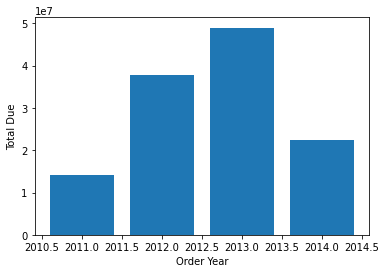

In [42]:
plt.bar(salesByYear.OrderYear, salesByYear.TotalDue )
plt.ylabel('Total Due')
plt.xlabel('Order Year')
plt.show()

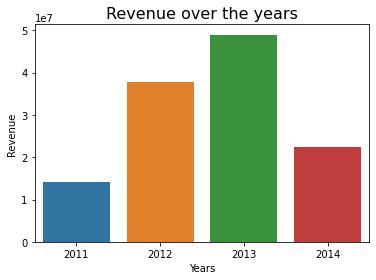

In [46]:
# I will change the bar plot using the seaborn package as the visualisation is better. 
sns.barplot(x='OrderYear', y='TotalDue',data=salesByYear)
#Add a Y Axis label 
plt.ylabel('Revenue')
#Add a X axis label
plt.xlabel('Years')
#Add a title but I will set a bigger font size.
plt.title('Revenue over the years', fontsize=16)
#This is required to show the bar chart.
plt.show()

In [49]:
# I also want to check if there is seasonality
salesByYearMonth=sales_date.groupby('OrderMonth_Year').sum().reset_index()
salesByYearMonth.head()

OrderMonth_Year  SalesOrderID      TotalDue  NumberofItems  OrderYear
0         2011-05       1878240  5.670209e+05            357      86473
1         2011-06       6171852  5.070965e+05            141     283551
2         2011-07      10154298  2.292183e+06            941     464541
3         2011-08      11049625  2.800576e+06           1242     502750
4         2011-09       6971114  5.547916e+05            157     315727

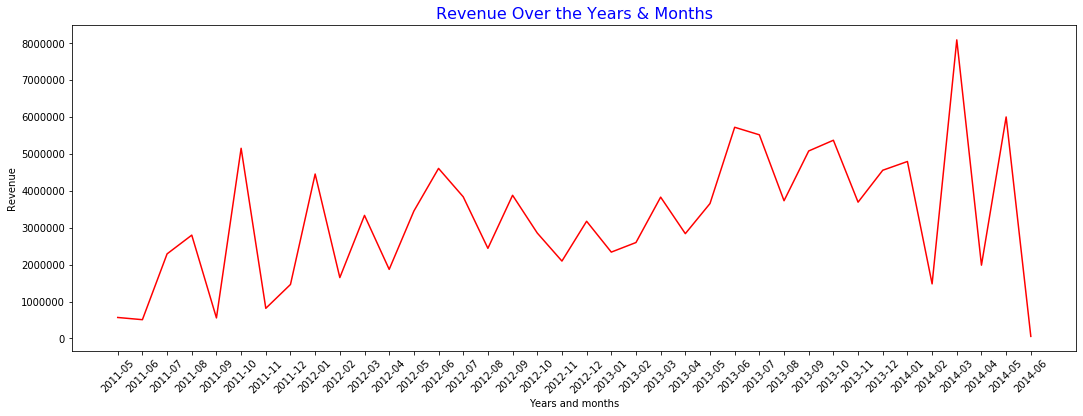

In [154]:
plt.figure(figsize=(18,6))
sns.lineplot(x='OrderMonth_Year', y='TotalDue',data=salesByYearMonth, color='red')
plt.ylabel('Revenue')
plt.xlabel('Years and months')
plt.title('Revenue Over the Years & Months', fontsize=16, color='blue')
plt.xticks(rotation=45)
plt.show()

## Question2: How is revenue divided by channel type overall and over time? ##

In [158]:
#I need to merge the sales worksheet with the customer worksheet using the sales ID column again using the salesOrderID column.
sales_customers=salesView.merge(viewCustomer, on='SalesOrderID',how='left')
sales_customers.head()

SalesOrderID    TotalDue  NumberofItems OnlineOrderFlag CustomerFirstName  \
0         43659  23153.2339             12         offline               NaN   
1         43660   1457.3288              2         offline               NaN   
2         43661  36865.8012             15         offline               NaN   
3         43662  32474.9324             22         offline               NaN   
4         43663    472.3108              1         offline               NaN   

  CustomerLastName EmployeeFirstName EmployeeLastName ChannelType  \
0              NaN              Tsvi           Reiter         B2B   
1              NaN              Tsvi           Reiter         B2B   
2              NaN              José          Saraiva         B2B   
3              NaN              José          Saraiva         B2B   
4              NaN             Linda         Mitchell         B2B   

  EmployeeFullName  
0      Tsvi Reiter  
1      Tsvi Reiter  
2     José Saraiva  
3     José Saraiva  
4   Linda Mitchell

In [162]:
sales_by_channel=sales_customers.groupby('ChannelType').sum().reset_index()
sales_by_channel

ChannelType  SalesOrderID      TotalDue  NumberofItems
0         B2B     204462343  9.077545e+07          60919
1         B2C    1664275472  3.244134e+07          60398

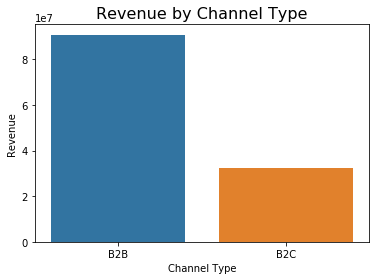

In [165]:
sns.barplot(x='ChannelType', y='TotalDue', data=sales_by_channel)
plt.xlabel('Channel Type')
plt.ylabel('Revenue')
plt.title('Revenue by Channel Type', fontsize='16')
plt.show()

In [176]:
#Merge the sales_date df with customer worksheet using the SalesOrderId

sales_customers_date=sales_date.merge(viewCustomer, on='SalesOrderID', how ='left')
                                      
sales_customers_date.head()


SalesOrderID    TotalDue  NumberofItems OnlineOrderFlag  OrderDate  \
0         43659  23153.2339             12         offline 2011-05-31   
1         43660   1457.3288              2         offline 2011-05-31   
2         43661  36865.8012             15         offline 2011-05-31   
3         43662  32474.9324             22         offline 2011-05-31   
4         43663    472.3108              1         offline 2011-05-31   

    ShipDate  OrderYear OrderMonth_Year CustomerFirstName CustomerLastName  \
0 2011-06-07       2011         2011-05               NaN              NaN   
1 2011-06-07       2011         2011-05               NaN              NaN   
2 2011-06-07       2011         2011-05               NaN              NaN   
3 2011-06-07       2011         2011-05               NaN              NaN   
4 2011-06-07       2011         2011-05               NaN              NaN   

  EmployeeFirstName EmployeeLastName ChannelType EmployeeFullName  
0              Tsvi           Reiter         B2B      Tsvi Reiter  
1              Tsvi           Reiter         B2B      Tsvi Reiter  
2              José          Saraiva         B2B     José Saraiva  
3              José          Saraiva         B2B     José Saraiva  
4             Linda         Mitchell         B2B   Linda Mitchell

In [183]:
#Group by OrderYear and ChannelType
sales_by_channel_date= sales_customers_date.groupby(['OrderYear','ChannelType']).sum().reset_index()
sales_by_channel_date.head()

OrderYear ChannelType  SalesOrderID      TotalDue  NumberofItems
0       2011         B2B      17999103  9.886952e+06           4515
1       2011         B2C      53451331  4.268748e+06           1201
2       2012         B2B      55440422  3.061409e+07          18946
3       2012         B2C     129437623  7.061613e+06           2743
4       2013         B2B      87767978  3.710689e+07          27614

In [190]:
sns.barplot(x='OrderYear', y='TotalDue', data=sales_by_channel_date, hue='ChannelType')
plt.xlabel('Order Year')
plt.ylabel('Total Revenue')
plt.title('Channel Type performace over Years', fontsize=16)
plt.show()

In [194]:
# I do not need to create another merge as I can use the existing df sales_customers_date and group by EmployeeFullName
sales_employees =sales_customers_date.groupby('EmployeeFullName').sum().reset_index()
sales_employees.head()

EmployeeFullName  SalesOrderID      TotalDue  NumberofItems  OrderYear
0      Amy Alberts       2155978  8.264175e+05            586      78503
1   David Campbell       9966638  4.207895e+06           2247     380364
2   Garrett Vargas      12415186  4.069422e+06           3284     470937
3          Jae Pak      19195780  9.585125e+06           6738     700480
4   Jillian Carson      24928694  1.134239e+07           7825     951928

In [197]:
#We need to sort this data which I will do in a ascending order. 
sorted_employees=sales_employees.sort_values('TotalDue', ascending=True, inplace=False)
sorted_employees.head()

EmployeeFullName  SalesOrderID      TotalDue  NumberofItems  OrderYear
14       Syed Abbas        964779  1.955288e+05            245      32212
0       Amy Alberts       2155978  8.264175e+05            586      78503
13    Stephen Jiang       2516344  1.235934e+06            792      96602
7     Lynn Tsoflias       6663235  1.606441e+06           1468     219460
10    Rachel Valdez       7870176  2.062393e+06           1783     261734

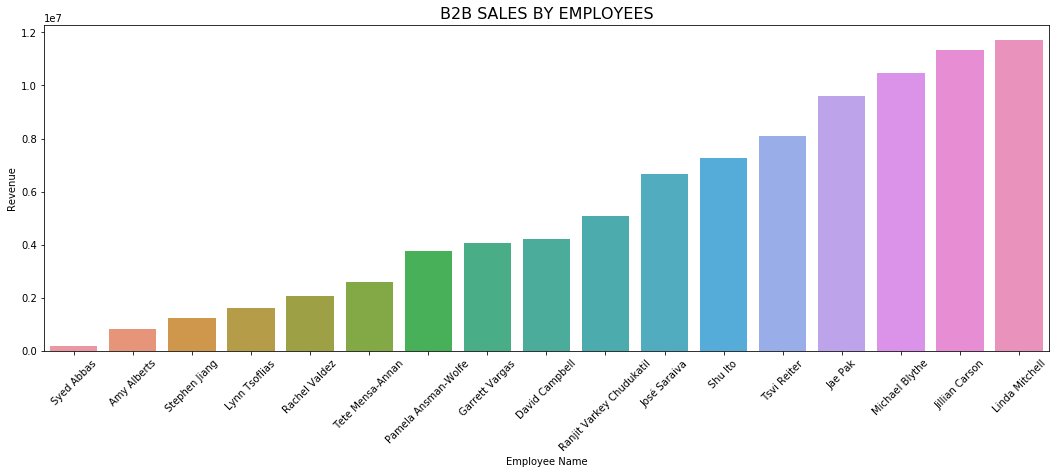

In [201]:
plt.figure(figsize=(18,6))
sns.barplot(x='EmployeeFullName', y='TotalDue', data=sorted_employees)
plt.xlabel('Employee Name')
plt.ylabel('Revenue')
plt.title('B2B SALES BY EMPLOYEES', fontsize=16)
plt.xticks(rotation=45)
plt.show()